In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
import re
import string

In [ ]:
data= pd.read_csv("train.csv")
data.sample(5)

,review_id,review_text,category
8166,df3a7eb411ec5cf8d0416f1e75be794e,"\nFurniture tidak terawat, pada rusak...\nTerd...",0
12749,ebb5491ed30ba67b28930d5982cb793c,"Keren pelayanan nya, tiap hari di kasih snack ...",1
14514,b498cb4510702383d658a0c87c11d24b,kurang sopan,0
4275,25636990c848d2268859f53259a1f2c0,"kamarnya bersih dn nyaman, cuma knp check in h...",1
6274,b813ebcba12bee2021ac3fb2bfa683c1,"kamar bau batang tikus, dan bau nya tdk bisa h...",0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14856 entries, 0 to 14855
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   review_id    14856 non-null  object
 1   review_text  14856 non-null  object
 2   category     14856 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 348.3+ KB


In [ ]:
data.isna().sum()

review_id      0
review_text    0
category       0
dtype: int64

In [ ]:
cat = ['review_id','review_text']
num = ['category']

In [ ]:
for col in cat:
    print(f'''Value count kolom {col}:     ''')
    print(data[col].value_counts())
    print()

Value count kolom review_id:     
7e3d27d5e5b0d90defc09033758f479b    1
3d4c9a55272081dac28e75f3ae74ec96    1
7253245ac9ffc0d848517d15f8516120    1
737c9e8c8f6753e1fb1fc4857af6c4fb    1
a4576745e55dfa5ee7f7c0d791071758    1
                                   ..
4cf4de3a696ae9e96a5f19ee691de9ce    1
26938415534972afe5ac8b4e3911dba8    1
7e0d127b11c44fe19985943a0fac6aec    1
b2d3d53207e9d06858ab7495280612ac    1
c4e4670c857e9900a90772d0a4951ed7    1
Name: review_id, Length: 14856, dtype: int64

Value count kolom review_text:     
tempat nya kurang bersih.. sudah beberapa kali menginap kamar yang di berikan selalu kamar yg sama. dan kurang tertata rapi.. di deskripsi kalo ruangan non smooking tapi kenapa pas buka laci meja yg ditemukan banyak puntung rokok..                                                1
Kamarnya kotor dan bau. Apalagi kamar mandi nya. Terlalu mahal  untuk harga yg tertera. Kelebihannya hanya dekat Malioboro saja. Saya langsung check out malam itu juga.Pindah hotel lain

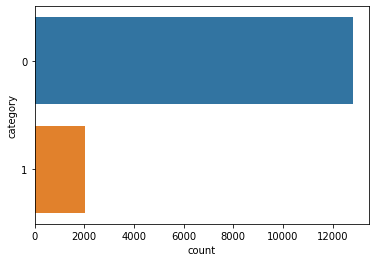

In [ ]:
sns.countplot(y='category', data=data);

In [ ]:
data['review_text'].unique()

array(['Penginapannya rapi, bersih, suasana tenang, pelayannya ramah dan banyak membantu. Lokasi cukup dekat ke beberapa obyek wisata. kalau saya ke bandung lagi mungkin saya akan menginap lagi di sini.',
       'wifi tidak sampai kamar, tidak tersedia heater untuk kopi/teh atau dispenser dan tidak tersedia kursi di depan kamar untuk merokok hingga harus duduk di lantai',
       'Lantai kamar mandi kotor, bau, dan seperti sdh jdi sarang nyamuk dikamar mandinya...pesan superior double yg dikasih twin...mungkin karena murah saya maklumin, tpi kedepan mohon untuk bisa jdi perbaikan untuk bisa lbh baik lg..',
       ...,
       'kamarnya terlalu kecil beberapa cm antara kasur dan dinding\n',
       'Wifinya sangat kurang memadai..',
       'Pelayan sangat sangat buruk. Dulu pelayan nya ramah, namun skrg ganti pelayan malah buruk. Tidak ramah. Not recommended'],
      dtype=object)

In [ ]:
#data cleaning
import re


def clean_train_data(x):
    teks = x
    teks = teks.lower()
    teks = re.sub('\[.*?\]', '', teks) # remove square brackets
    teks = re.sub(r'[^\w\s]','',teks) # remove punctuation
    teks = re.sub('\w*\d\w*', '', teks) # remove words containing numbers
    teks = re.sub(r'http\S+', '', teks)
    teks = re.sub('\n', '', teks)
    return teks



In [ ]:
clean_combine_data = data.copy()
clean_combine_data['review_text'] = data.review_text.apply(lambda x : clean_train_data(x))
clean_combine_data.head()

,review_id,review_text,category
0,0fc651bfdd38a3b4ba19ef9d0d1e92e3,penginapannya rapi bersih suasana tenang pelay...,1
1,7d8cb2e465c5602e51c1ba8710e8ff16,wifi tidak sampai kamar tidak tersedia heater ...,0
2,1f4447c73e5e1aac462d05b0ecbd5a55,lantai kamar mandi kotor bau dan seperti sdh j...,0
3,b9aefbfb0debbfff43f8b268c82b43c0,wc jorok kasur tidak dibersihkan handuk tidak ...,0
4,e2afef18bd695fae43d4d53b8c547bd4,bocor lagi,0


In [ ]:
clean_combine_data.tail()

,review_id,review_text,category
14851,5ed96732e4f1e1e69dfb8669cf507587,kotor dan tidak ada wifi,0
14852,b0692bdf4926ee0d58c2d9a0f28b0d62,kamar tidak bersih,0
14853,5217f5f284066f232d7b3c3bbd3cccd2,kamarnya terlalu kecil beberapa cm antara kasu...,0
14854,31ca5a04ccc0dae4eaafc91c9822bede,wifinya sangat kurang memadai,0
14855,aadb614310e5ceb79b4c68d14f8dab8a,pelayan sangat sangat buruk dulu pelayan nya r...,0


In [ ]:
nltk.download('stopwords')
ind_stopwords = nltk.corpus.stopwords.words("indonesian")
 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def remove_ind_stopwords(review_text):
    token_text = nltk.word_tokenize(review_text)
    remove_stop = [word for word in token_text if word not in ind_stopwords]
    join_text = ' '.join(remove_stop)
    return join_text

In [ ]:
nltk.download('punkt')
stopword_combine_data = clean_combine_data.copy()
stopword_combine_data['review_text'] = data.review_text.apply(lambda x : remove_ind_stopwords(x))
stopword_combine_data.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,review_id,review_text,category
0,0fc651bfdd38a3b4ba19ef9d0d1e92e3,"Penginapannya rapi , bersih , suasana tenang ,...",1
1,7d8cb2e465c5602e51c1ba8710e8ff16,"wifi kamar , tersedia heater kopi/teh dispense...",0
2,1f4447c73e5e1aac462d05b0ecbd5a55,"Lantai kamar mandi kotor , bau , sdh jdi saran...",0
3,b9aefbfb0debbfff43f8b268c82b43c0,"Wc jorok.. Kasur dibersihkan , , handuk diganti ,",0
4,e2afef18bd695fae43d4d53b8c547bd4,bocor,0


In [ ]:
from itertools import chain
from collections import Counter


list_words = stopword_combine_data['review_text'].str.split()
list_words_merge = list(chain(*list_words))

d = Counter(list_words_merge)
df = pd.DataFrame(data=d, index=['count'])
top_common_words = df.T.sort_values(by=['count'], ascending=False).reset_index().head(50)
top_common_words.head()


,index,count
0,",",17074
1,.,13561
2,kamar,7332
3,nya,2729
4,mandi,2548


In [ ]:
top_common_words

,index,count
0,",",17074
1,.,13561
2,kamar,7332
3,nya,2729
4,mandi,2548
5,yg,2478
6,air,2218
7,...,2056
8,bersih,1850
9,ga,1704


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text major ticklabel objects>)

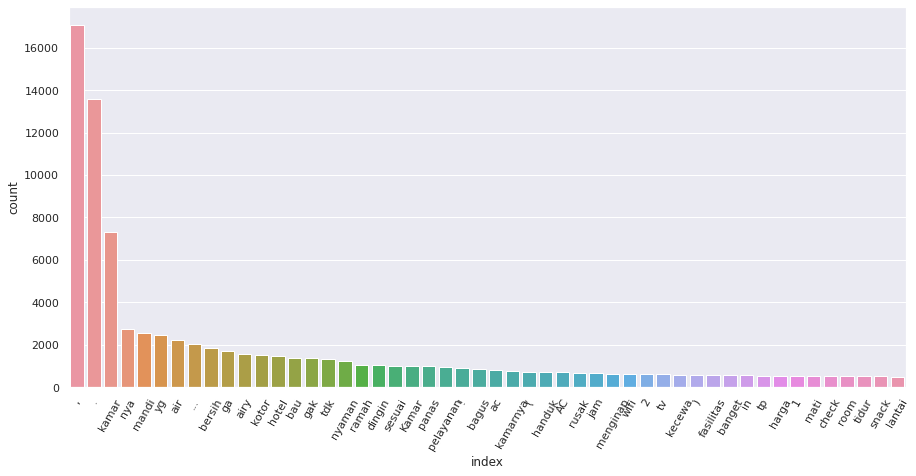

In [ ]:
plt.figure(figsize=(15,7))
sns.set(style="darkgrid")
sns.barplot(x="index", y='count', data=top_common_words)
plt.xticks(rotation=60)

In [ ]:
#lemmatizion

from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer



In [ ]:
nltk.download('wordnet')
lemm = WordNetLemmatizer()

def word_lemmatizer(text):
    token_text = nltk.word_tokenize(text)
    remove_stop = [lemm.lemmatize(w) for w in token_text]
    join_text = ' '.join(remove_stop)
    return join_text

lemmatize_data = stopword_combine_data.copy()
lemmatize_data['review_text'] = data.review_text.apply(lambda x : word_lemmatizer(x))
lemmatize_data.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


,review_id,review_text,category
0,0fc651bfdd38a3b4ba19ef9d0d1e92e3,"Penginapannya rapi , bersih , suasana tenang ,...",1
1,7d8cb2e465c5602e51c1ba8710e8ff16,"wifi tidak sampai kamar , tidak tersedia heate...",0
2,1f4447c73e5e1aac462d05b0ecbd5a55,"Lantai kamar mandi kotor , bau , dan seperti s...",0
3,b9aefbfb0debbfff43f8b268c82b43c0,"Wc jorok.. Kasur tidak dibersihkan , , handuk ...",0
4,e2afef18bd695fae43d4d53b8c547bd4,bocor lagi,0


In [ ]:
string = ' '.join(lemmatize_data['review_text'])

str_val = string.split(" ")

In [ ]:
#unigram analysis
data_unigram=(pd.Series(nltk.ngrams(str_val, 1)).value_counts())[:30]

data_unigram_df=pd.DataFrame(data_unigram)
data_unigram_df = data_unigram_df.reset_index()
data_unigram_df = data_unigram_df.rename(columns={"index": "key", 0: "value"})
data_unigram_df.head()

,key,value
0,"(,,)",17074
1,"(.,)",13561
2,"(kamar,)",7332
3,"(tidak,)",5813
4,"(dan,)",5227


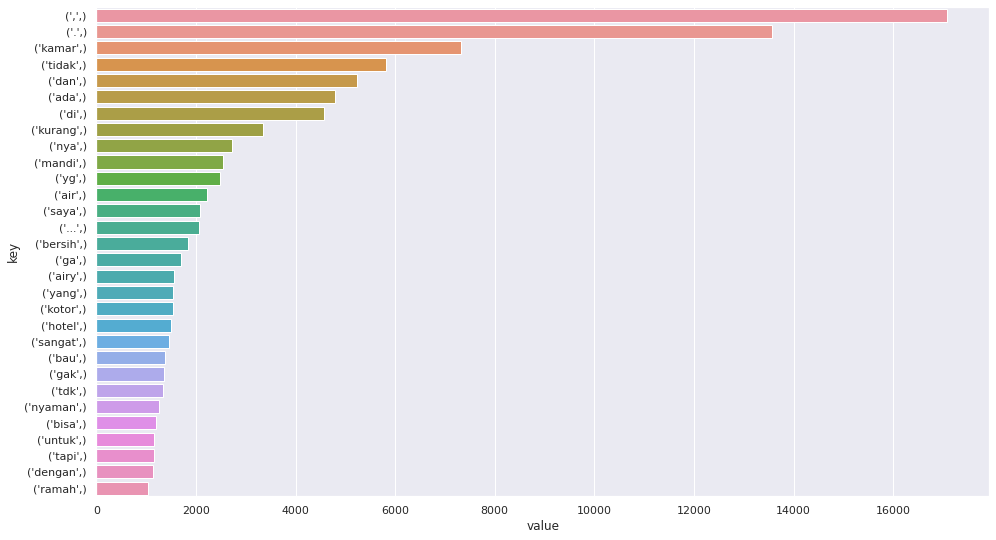

In [ ]:

#unigram
plt.figure(figsize = (16,9))
sns.barplot(x='value',y='key', data=data_unigram_df)

In [ ]:
#modelling
model_data = lemmatize_data.copy()


model_data['combine_text'] =  model_data['review_text'] 

del model_data['review_id']
del model_data['review_text']
model_data.head()

,category,combine_text
0,1,"Penginapannya rapi , bersih , suasana tenang ,..."
1,0,"wifi tidak sampai kamar , tidak tersedia heate..."
2,0,"Lantai kamar mandi kotor , bau , dan seperti s..."
3,0,"Wc jorok.. Kasur tidak dibersihkan , , handuk ..."
4,0,bocor lagi


In [ ]:
model_data.shape

(14856, 2)

In [ ]:
baik = model_data.query('category==1')
buruk = model_data.query('category==0')

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
data_vec = vectorizer.fit_transform(model_data['combine_text'])
data_vec

<14856x13553 sparse matrix of type '<class 'numpy.int64'>'
	with 217348 stored elements in Compressed Sparse Row format>

In [ ]:
print(model_data['combine_text'][1])#mau liat data urut 2

wifi tidak sampai kamar , tidak tersedia heater untuk kopi/teh atau dispenser dan tidak tersedia kursi di depan kamar untuk merokok hingga harus duduk di lantai


In [ ]:
ekstraksi_kata = vectorizer.get_feature_names()#liat hasil combinetext yg di vetorisasi

In [ ]:
random = model_data.sample(frac=1)#random sample

In [ ]:
train = random[:11884]#pembagian data train 80% dan test 20%
test = random[2972:]

In [ ]:
train1 = vectorizer.fit_transform(train['combine_text'])#training pada data train
train1

<11884x11978 sparse matrix of type '<class 'numpy.int64'>'
	with 174325 stored elements in Compressed Sparse Row format>

In [ ]:
test1 = vectorizer.transform(test['combine_text'])#training pada data test
test1

<11884x11978 sparse matrix of type '<class 'numpy.int64'>'
	with 172169 stored elements in Compressed Sparse Row format>

In [ ]:
train_label = train['category']#ambil label baik/buruk
test_label = test['category']

In [ ]:
from sklearn.ensemble import RandomForestClassifier #klasifikasi use randomforest
random_forest = RandomForestClassifier(n_estimators=150)

In [ ]:
random_forest.fit(train1, train_label) #lakukan traing randomforest yang sudah ditransform

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
random_forest.score(test1, test_label)

0.9821608885897004

In [ ]:
random_forest.score(train1, train_label)

0.9996634129922585

In [ ]:
data1 = pd.read_csv("test.csv")
data1.head()

,review_id,review_text
0,7302180ac7160f04a405d8aa7bd6beb8,"Kasur rusak, punggung saya sakit, kasurnya ga ..."
1,3184c670e170f565c7522eb76a320ba1,gerah
2,e33abf6bb5d5a9a77c339043b1725dc8,"tempat ridur atas bawah.. ac nya pararel, tdk ..."
3,061d388950340070a6ac03fabc9027b0,"ac kurang dingin, tidak ada snack sperti di foto"
4,e62d87c348674b6c06856964f3ab16b8,Lumayan untuk guest house dengan standart harg...


In [ ]:
model_data1 = data1.copy()#bentuk data testing
model_data1['combine_text'] =  data1['review_text']
del model_data1['review_text']
model_data1

,review_text,combine_text
0,"Kasur rusak, punggung saya sakit, kasurnya ga ...","Kasur rusak, punggung saya sakit, kasurnya ga ..."
1,gerah,gerah
2,"tempat ridur atas bawah.. ac nya pararel, tdk ...","tempat ridur atas bawah.. ac nya pararel, tdk ..."
3,"ac kurang dingin, tidak ada snack sperti di foto","ac kurang dingin, tidak ada snack sperti di foto"
4,Lumayan untuk guest house dengan standart harg...,Lumayan untuk guest house dengan standart harg...
...,...,...
3709,Tolong kamar 214 kulkasnya dibagusin..!!!,Tolong kamar 214 kulkasnya dibagusin..!!!
3710,"buruk sekali, sangat mengecewakan.\n","buruk sekali, sangat mengecewakan.\n"
3711,Lampu redup. Bau pengap. Dalam kamar mandi ga ...,Lampu redup. Bau pengap. Dalam kamar mandi ga ...
3712,"Kamar mawar tidak bisa dikunci dari luar, suas...","Kamar mawar tidak bisa dikunci dari luar, suas..."


In [ ]:
test2 = vectorizer.transform(model_data1['combine_text'])#training pada data test
test2

<3714x11978 sparse matrix of type '<class 'numpy.int64'>'
	with 51192 stored elements in Compressed Sparse Row format>

In [ ]:
prediksi1 = random_forest.predict(test2)#hasil prediksi untuk data testing
prediksi1.tolist()

[0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,


In [ ]:
from numpy import asarray
from numpy import savetxt
data = prediksi1
savetxt("prediksi_Sentimen.csv", data, delimiter=",")

In [ ]:
prediksi1.tostring

<function ndarray.tostring>

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
data1['prediksi1'] = data1.apply(lambda _: '', axis=1)#menambahkan kolom label

,review_id,review_text,label,prediksi1
0,7302180ac7160f04a405d8aa7bd6beb8,"Kasur rusak, punggung saya sakit, kasurnya ga ...",,
1,3184c670e170f565c7522eb76a320ba1,gerah,,
2,e33abf6bb5d5a9a77c339043b1725dc8,"tempat ridur atas bawah.. ac nya pararel, tdk ...",,
3,061d388950340070a6ac03fabc9027b0,"ac kurang dingin, tidak ada snack sperti di foto",,
4,e62d87c348674b6c06856964f3ab16b8,Lumayan untuk guest house dengan standart harg...,,
